<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

## Data Science Project, IBM Professional Certification
Judith R Connelly, June 2020

### Purpose 
The purpose of this project is to examine real world organizational data within the IBM Python Jupyter framework, to understand the relationship of the elements, to assess machine learning classifiers of the data to determine the best model that represents predictive capability of the dataset and geographically map the categorical data.

### Table of Contents
 1. Background
 2. The Problem Statement
 3. Proposed Approach
 4. Data Description
 5. Methodology
 6. Data Analysis and Results
 7. Conclusion
 8. Recommendations
 
### 1. Background

Data useful for research organizations are always in high demand but how do we effectively manage the resources for research and development? By definition, research is a non-deterministic effort and often results desired  are not well-defined from the beginning. The nature of core research takes on a life of its own as the work progresses.  As a program manager, it is useful to understand and effective use tools such as Earned Value metrics and project management tools to guide critical time lines and resources. These resources include personnel and funding. The tradespace of resources is a persistent challenge. The requested work for a research organization varies especially when servicing operational field missions. These missions span a spectrum of initial conditions as well as constraints in the field environment. These field environments exist in all 50 states and US territories. Therefore, it is advantageous to understand the operational needs of the field as well as the likelihood that the management of research projects balances the end-user needs and maximizes the resources available to perform the work.

### 2. The Problem Statement
In order to maximize resources it is necessary to understand what resources are available during any given time, the skills of the personnel able to perform the work and the funding likely to be expended. It is necessary to consider the criticality of the work. How time critical is the solution to be provided? How time intensive is the work? How well can the skill set meet the request?

### 3. Proposed Approach
It is required in this project to understand the best model that will assess the data set constructed for this work. This model can then provide a systematic, consistent and sustainable means to manage research resources based on operational need and research resources. Specifically, based on three parameters (priority ranking, performing subgroup and funding level) this project expects to enhance an understanding of how an independent priority ranking influences whether a project will be executed or placed on hold for future execution (target value). Repeatable results are important in research so I have include code/output.

### 4. Data Description
The data was framed from one of the Machine Learning lab templates. Subsequent manipulation produced characteristic parameters and values that were relevant to the research and development work context. These data are directly related to my present work so the validation of dataset was performed based on professional knowledge of the domain space. These data are organically generated from real world characteristics in a research organization.  Each of the final field are described as follows:

UDI1 and UDI2 :  The identifiers to the specific artifact produced by the organizational research.

FYHold : The field for identifying whether a project is put on hold or proceeds to be executed

FUNDS: The scaled amount of funding for the project ( e.g. $50K)

Months: The length of project execution

Effective _date: The date when a project is executed. Note: this field is useful for future recommended work

Due_date: The date the project is expected to be completed. Note: this field is useful for future recommended work

Score: The weighted score received after organizational review

Group: The technical branches within the organization

ORG: The Research organization(performer) or the Operational Unit(requester). Note the mapping is related to the locations of the units.  This has a direct bearing on the type of work to be performed or area of interest to operational units.


### 5. Methodology
Three classifier methods(K Nearest Neighbor, Support Vector Model and Decision Tree) were evaluated against the data training/test set. These results are provided for consideration in the report. From these data, assessment of workload, funding and priority drivers can be managed in real-world organizations. Specific tasks and approaches are described inline below. Overall, I wrangled and changed the data frame values to be more relevant to the problem set at hand for the research organization. I reused code with modifications from my previous assignment submissions that were needed particularly the classifiers section. I regularly reviewed previous modules (6,7,8 most helpful) and reworked labs exercises to gain further insight into the algorithms and best use practices. Throughout the next sections, the data is described, how it is wrangled and what the exploratory results might reveal as useful organizational information. Once the data is well understood the train/test set dataframe is passed to the classifier models. 

For each model, it is important to ask, “How accurate is this model?” This is done through comparison of the actual values in the test set with the values predicted by the model, to calculate the accuracy of the model.  The evaluation metrics used in this report for each classifier are Jaccard index and  F1-score. These are representative of the goodness of the classifier to the data. The simplest is the Jaccard index and can be described as the amount of actual and predicted data that overlap as in a Venn diagram. The F1Score is a more complicated approach which evaluates True/False positives and True/False negatives. The summary results provide the three classifier performance with the two evaluation metrics.

I chose the K Nearest Neighbor(KNN) model with the concept that the request or ideations of research ideas could be treated as a member of a demographic. It has elements shared by other projects both technically and organizationally. In this treatment of demographic it would be useful to predict whether a research request would be executed as a project or put onhold as well as which technical branch is likely to be assigned the project. Ideally, this could be performed with "standardized keyword associations with historical data but data of this type was not available for  for this capstone work.  This is a classification problem. That is, given the dataset with predefined labels, we need to build a model to be used to predict the class of a new or unknown case. The example focuses on using as the feature set such as score, months, and assigned branch to predict onhold or execution status patterns. 

I chose the Support Vector Model(SVM) because the analysis of the original and organic data has characteristics that differ significantly between between project. While there are similarities the nature of research is to explore something that is likely different from the rest, so to speak. The  SVM, as a classifier trains the model to understand patterns within the data that might show. These patterns across organizational structures are interesting to examine.

I chose Decision Tree classifier because in the data constructed for this report various factors exist in the real-world decision making. For example an idea might be relevant to the operator needs but does not score highly in the organizational assessment. Perhaps it is put onhold because its a good idea but it is not technically feasible work. Perhaps it scores highly, relevant to operational needs but is not funded. Which of these considerations/attributes are more (or most important in the decision making). Several factors in this decision tradespace are interesting to evaluate.

### 6. Data Analysis and Results
The sections that follow contain the code executed in Python through Jupyter labs interface hosted by IBM.  Each block contains the code executed and the results from the code. Original dataframes are provided along with the wrangling methods. Results are displayed immediately following the code used to product them. Maps using Folium and Foursquare are used to display the location of the requests from field operational units as well as nearby venues of interest while on work travel. 

In [51]:
## Import all the tools needed
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
#
import pandas as pd
import numpy as np
#
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
#
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> anaconda::ca-certificates-2020.1.1-0
  certifi            conda-forge::certifi-2020.4.5.1-py36h~ --> anaconda::certifi-2020.4.5.1-py36_0
  openssl            conda-forge::openssl-1.1.1g-h516909a_0 --> anaconda::openssl-1.1.1g-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


#### 6.1 Load Data From CSV File  and develop a series of manipulations to get data in required format.
The original data is read from the source file and preserved. Two data frames are created for wrangling. 
Since the original data in the columns represent similar data as applied to this problem, I modify the field contents, the field headers
to fit the problem space domain.

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"

--2020-05-24 22:58:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2020-05-24 22:58:27 (1.06 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
# Read in, copy and preserve original
df = pd.read_csv('loan_train.csv')
df
df_rdc = df
df_rdc
# Dump file
#df = pd.read_csv(filename, names = headers)
headers = ["UDI1","UDI2","FYHold","FUNDS","Months", "effective_date","due_date","Score","Group","ORG"]
df_newhead = pd.read_csv(filename, names = headers)
df_newhead

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
0,NaN,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
1,0.0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
2,2.0,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3.0,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4.0,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
...,...,...,...,...,...,...,...,...,...,...
342,394.0,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
343,395.0,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
344,397.0,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
345,398.0,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
## Make relevant data to our work
#Drop row with NaN and float scorevalue, average score is normalized
df_newhead.dropna(subset=["UDI1"], axis=0, inplace=True)
df_newhead["Score"]=df_newhead["Score"].astype("float")

##. Here are the headers = ["UDI1","UDI2","FYHold","FUNDS","Months", "effective_date","due_date","Score","Group","ORG"]
df_rdc.replace({'loan_status': {'PAIDOFF': 'onhold', 'COLLECTION': 'FY'}}, inplace=True)
df_newhead.replace({'FYhold': {'PAIDOFF': 'onhold', 'COLLECTION': 'FY'}}, inplace=True)


df_rdc.replace({'education': {'High School or Below': 'MSCOE', 'Bechalor': 'AVIATION','college':'STIC', 'Master or Above':'Surface'}},inplace=True)
df_newhead.replace({'Group': {'High School or Below': 'MSCOE', 'Bechalor': 'AVIATION','college':'STIC', 'Master or Above':'Surface'}},inplace=True)

## Terms is 1 or 2 year execution
df_rdc.replace({'terms': {15: 24, 30: 12}},inplace=True)
df_newhead.replace({'Months': {15: 24, 30: 12}},inplace=True)

df_rdc.replace({'Gender': {'male': 'RDC', 'female': 'OPS'}},inplace=True)
df_newhead.replace({'ORG': {'male': 'RDC', 'female': 'OPS'}},inplace=True)
df_newhead.replace({'Months': {15: 24, 30: 12}},inplace=True)

#
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
#df_rdc['city-L/100km'] = 235/df["city-mpg"]
df_rdc.age.max()
df_rdc.age.min()
df_newhead.Score.max()
df_newhead.Score.min()
print ("Min score",df_rdc.age.min())
print ("Max Score", df_rdc.age.max())
#print ("Min score",df_newhead.Score.min())
#print ("Max Score",df_newhead.Score.max())
df_newhead.head(30)
df_newhead['FYHold'].value_counts()

Min score 18
Max Score 51


PAIDOFF       260
COLLECTION     86
Name: FYHold, dtype: int64

In [9]:
#make numbers mroe interesting
df_newhead["Score"]= 23/df_newhead["Score"]
#df_rdc['city-L/100km'] = 235/df["city-mpg"]
df_newhead.replace({'FYHold': {'PAIDOFF': 'onhold', 'COLLECTION': 'FY'}}, inplace=True)
df_newhead.head(30)

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
1,0.0,0,onhold,1000.0,30,2016-09-08,2016-10-07,0.511111,MSCOE,RDC
2,2.0,2,onhold,1000.0,30,2016-09-08,2016-09-22,0.696970,AVIATION,OPS
3,3.0,3,onhold,1000.0,15,2016-09-09,2016-10-08,0.851852,STIC,RDC
4,4.0,4,onhold,1000.0,30,2016-09-09,2016-10-08,0.821429,STIC,OPS
5,6.0,6,onhold,1000.0,30,2016-09-09,2016-10-08,0.793103,STIC,RDC
6,7.0,7,onhold,1000.0,30,2016-09-09,2016-10-08,0.638889,STIC,RDC
7,8.0,8,onhold,1000.0,30,2016-09-10,2016-09-24,0.821429,STIC,RDC
8,9.0,9,onhold,800.0,15,2016-09-10,2016-09-16,0.884615,STIC,RDC
9,10.0,10,onhold,300.0,7,2016-09-10,2016-10-09,0.793103,STIC,RDC
10,11.0,11,onhold,1000.0,15,2016-09-10,2016-10-09,0.589744,MSCOE,RDC


Minimum and maximum score from Organizational Portfolio review

In [10]:
df_newhead["Score"]= df_newhead["Score"].astype("float")
# Make numbers mroe interesting
df_newhead["Score"]= 23/df_newhead["Score"]
#df_rdc['city-L/100km'] = 235/df["city-mpg"]
df_newhead.head(30)

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
1,0.0,0,onhold,1000.0,30,2016-09-08,2016-10-07,45.0,MSCOE,RDC
2,2.0,2,onhold,1000.0,30,2016-09-08,2016-09-22,33.0,AVIATION,OPS
3,3.0,3,onhold,1000.0,15,2016-09-09,2016-10-08,27.0,STIC,RDC
4,4.0,4,onhold,1000.0,30,2016-09-09,2016-10-08,28.0,STIC,OPS
5,6.0,6,onhold,1000.0,30,2016-09-09,2016-10-08,29.0,STIC,RDC
6,7.0,7,onhold,1000.0,30,2016-09-09,2016-10-08,36.0,STIC,RDC
7,8.0,8,onhold,1000.0,30,2016-09-10,2016-09-24,28.0,STIC,RDC
8,9.0,9,onhold,800.0,15,2016-09-10,2016-09-16,26.0,STIC,RDC
9,10.0,10,onhold,300.0,7,2016-09-10,2016-10-09,29.0,STIC,RDC
10,11.0,11,onhold,1000.0,15,2016-09-10,2016-10-09,39.0,MSCOE,RDC


Some data conversions are required to float. The date/time is modified though not used directly here but will be useful if recommondations are implemented.

In [11]:
# Conversions
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()
df_rdc['due_date'] = pd.to_datetime(df_rdc['due_date'])
df_rdc['effective_date'] = pd.to_datetime(df_rdc['effective_date'])
df_rdc 

df_newhead['due_date'] = pd.to_datetime(df_rdc['due_date'])
df_newhead['effective_date'] = pd.to_datetime(df_rdc['effective_date'])

df_newhead["FUNDS"]= df_newhead["FUNDS"].astype("float")
df_newhead["Months"]= df_newhead["Months"].astype("int")

#make numbers mroe interesting
#df_newhead["FUNDS"]= df_newhead["FUNDS"]/3.25
#df_rdc['city-L/100km'] = 235/df["city-mpg"]

#df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#df.groupby(['education'])['loan_status'].value_counts(normalize=True)
#df_rdc['Gender'].replace(to_replace=['RDC','ACQ'], value=[0,1],inplace=True)
#df_newhead['ORG'].replace(to_replace=['RDC','ACQ'], value=[0,1],inplace=True)
df_newhead.head(30)
df_newhead.dtypes

UDI1                     float64
UDI2                      object
FYHold                    object
FUNDS                    float64
Months                     int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
Score                    float64
Group                     object
ORG                       object
dtype: object

#### Data visualization and pre-processing

Let’s see how many of each class is in our data set 

In [12]:
## Let's convert the original to RDC relevant

#df['loan_status'].value_counts()

#
print(" Projects Funded and Onhold ")
df_rdc['loan_status'].value_counts()
df_newhead['FYHold'].value_counts()

 Projects Funded and Onhold 


onhold    260
FY         86
Name: FYHold, dtype: int64

260 Projects Onhold while 86 To Be Executed.


Let's plot some columns to see relationships amongst the columns values. The first two graphs represent the original. The second two represent the modified data for our work. This is provided for comparison of the change not for meaningful data. It also verifies the data changes were made as expected.

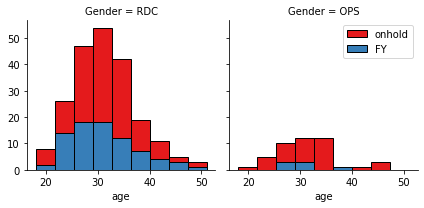

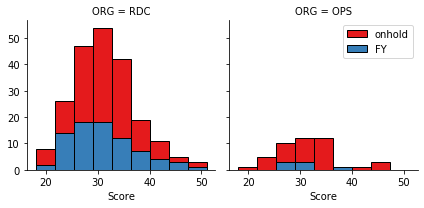

Min score 18
Max Score 51
New Min score 18.0
New Max Score 51.0


In [13]:
import seaborn as sns

#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
# show relation to score 18 - 51
bins = np.linspace(df_rdc.age.min(), df_rdc.age.max(), 10)
g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
#--------------------------------------------
# show relation to score 18 - 51
bins = np.linspace(df_newhead.Score.min(), df_newhead.Score.max(), 10)
g = sns.FacetGrid(df_newhead, col="ORG", hue="FYHold", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
print ("Min score",df_rdc.age.min())
print ("Max Score", df_rdc.age.max())
print ("New Min score",df_newhead.Score.min())
print ("New Max Score", df_newhead.Score.max())

These show the data has changed as expected.

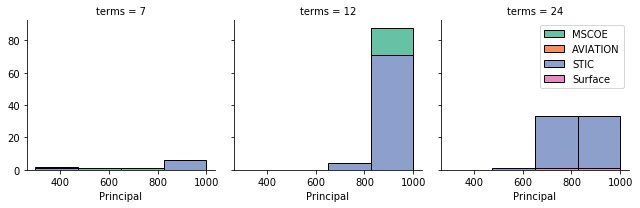

UDI1                     float64
UDI2                      object
FYHold                    object
FUNDS                    float64
Months                     int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
Score                    float64
Group                     object
ORG                       object
dtype: object

In [15]:
bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 5)
g = sns.FacetGrid(df_rdc, col="terms", hue="education", palette="Set2", col_wrap=3)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
df_rdc
df_rdc.dtypes

#bins = np.linspace(df_newhead.FYHold.min(), df_newhead.FYHold.max(), 5)
#g = sns.FacetGrid(df_newhead, col="FUNDS", hue="Group", palette="Set2", col_wrap=3)
#g.map(plt.hist, 'FUNDS', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
#df_rdc
df_newhead.dtypes

#### 6.2 Classifier Pre-processing:  Feature selection/extraction

The target variable is the determination that a project will execute or placed onhold given the Train/Test set. The is the "Y" dataframe. I check the datatypes to be sure these can be used in the classifiers when passed.The "X" dataframe features are the Scores, the Branch, Months of execution. Next I convert categorical features to numerical values and explore grouping relationships.

In [16]:
df_rdc.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#male/rfeamle translate to RDC and ACQ
df_rdc.groupby(['Principal'])['education'].value_counts(normalize=True)

df_newhead.groupby(['ORG'])['FYHold'].value_counts(normalize=True)
df_newhead.groupby(['Group'])['FUNDS'].value_counts(normalize=True)
df_newhead.groupby(['Months'])['Group'].value_counts(normalize=True)
#df_rdc
#df_rdc.hist(column='age', bins=50)
#df_newhead.hist(column='Score', bins=50)

Months  Group   
7       STIC        0.500000
        MSCOE       0.357143
        AVIATION    0.142857
15      STIC        0.452703
        MSCOE       0.385135
        AVIATION    0.148649
        Surface     0.013514
30      MSCOE       0.483696
        STIC        0.407609
        AVIATION    0.108696
Name: Group, dtype: float64

In [17]:
df_newhead.groupby(['ORG'])['FYHold'].value_counts(normalize=True)

ORG  FYHold
OPS  onhold    0.865385
     FY        0.134615
RDC  onhold    0.731293
     FY        0.268707
Name: FYHold, dtype: float64

df_newhead.groupby(['Group'])['FUNDS'].value_counts(normalize=True)

For Principal/Cost amounts (x10k) EX) For this sample data 75 percent  Aviation projects with funding at 88K USD, Surface has 50 percent of their projects funded at 71K USD. In this sampling MSCOE had 48 percent of project lasting 30 months and half of Surface projects last 7 months.

Below is the dataframe in current form. There is still some wrangling to do.To get parameters in float from object type. Also to make more diverse the Principal ( aka Funding amount). Note here is where we could use the two unused columns ("Unnamed") for other metric. The date column could also be used to capture metrics like time from request to execution to completion.This project only uses a subset to illustrate the usefulness of the Data Science tools.


In [18]:
#df_rdc['Gender'].replace(to_replace=['RDC','ACQ'], value=[0,1],inplace=True)
#df_rdc.head()
#df_rdc['Gender']
#df_rdc['education'].replace(to_replace=['MSCOE','STIC','AVIATION','Surface'], value=[0,1,2,3],inplace=True)
print(df_rdc)
print(df_newhead)

     Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0             0             0      onhold       1000     12     2016-09-08   
1             2             2      onhold       1000     12     2016-09-08   
2             3             3      onhold       1000     24     2016-09-08   
3             4             4      onhold       1000     12     2016-09-09   
4             6             6      onhold       1000     12     2016-09-09   
..          ...           ...         ...        ...    ...            ...   
341         394           394          FY        800     24     2016-09-11   
342         395           395          FY       1000     12     2016-09-11   
343         397           397          FY        800     24     2016-09-12   
344         398           398          FY       1000     12     2016-09-12   
345         399           399          FY       1000     12     2016-09-12   

      due_date  age education Gender  
0   2016-10-07   45     

In [62]:
#df.groupby(['education'])['loan_status'].value_counts(normalize=True)

#df_rdc.groupby(['education'])['loan_status'].value_counts(normalize=True)
#df_rdc.groupby(['education'])['terms'].value_counts(normalize=True)

Now let's explore relationship by Group for length of project in Months. This might reveal how project length is associated with a Branch

Of those categorized as Aviation, 45% executed as 30 month projects
Of those categorized as MSCOE 37% executed as 15 month projects
Of those categorized as STIC 44% executed as 15 month projects

In [19]:
df_newhead.groupby(['Group'])['Months'].value_counts(normalize=True)

Group     Months
AVIATION  15        0.500000
          30        0.454545
          7         0.045455
MSCOE     30        0.589404
          15        0.377483
          7         0.033113
STIC      30        0.503356
          15        0.449664
          7         0.046980
Surface   15        1.000000
Name: Months, dtype: float64

In [20]:
print ('Look at by Group for onhold or execute')
print ('This might reveal how Branch relates to onhold or execution status ')
df_newhead.groupby(['Group'])['FYHold'].value_counts(normalize=True)

Look at by Group for onhold or execute
This might reveal how Branch relates to onhold or execution status 


Group     FYHold
AVIATION  onhold    0.750000
          FY        0.250000
MSCOE     onhold    0.741722
          FY        0.258278
STIC      onhold    0.765101
          FY        0.234899
Surface   FY        0.500000
          onhold    0.500000
Name: FYHold, dtype: float64

In [21]:
print ('Look at by Score for onhold or execute')
print ('This might reveal how Branch and Score could be related')
df_newhead.groupby(['Group'])['Score'].value_counts(normalize=True)


Look at by Score for onhold or execute
This might reveal how Branch and Score could be related


Group     Score
AVIATION  34.0     0.136364
          35.0     0.136364
          24.0     0.090909
          26.0     0.090909
          28.0     0.090909
                     ...   
STIC      44.0     0.006711
          45.0     0.006711
          51.0     0.006711
Surface   39.0     0.500000
          50.0     0.500000
Name: Score, Length: 74, dtype: float64

In [22]:
df_newhead.dtypes

UDI1                     float64
UDI2                      object
FYHold                    object
FUNDS                    float64
Months                     int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
Score                    float64
Group                     object
ORG                       object
dtype: object

In [23]:
df_newhead.head()

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
1,0.0,0,onhold,1000.0,30,2016-09-08,2016-10-07,45.0,MSCOE,RDC
2,2.0,2,onhold,1000.0,30,2016-09-08,2016-09-22,33.0,AVIATION,OPS
3,3.0,3,onhold,1000.0,15,2016-09-09,2016-10-08,27.0,STIC,RDC
4,4.0,4,onhold,1000.0,30,2016-09-09,2016-10-08,28.0,STIC,OPS
5,6.0,6,onhold,1000.0,30,2016-09-09,2016-10-08,29.0,STIC,RDC


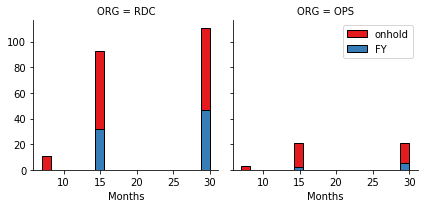

In [24]:
#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="loan_status", hue="education", palette="Set3", col_wrap=2)
#g.map(plt.hist, 'loan_status', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
#
#bins = np.linspace(df_newhead.Months.min(), df_newhead.Months.max(), 10)
#g = sns.FacetGrid(df_newhead, col="FYHold", hue="Group", palette="Set3", col_wrap=2)
#g.map(plt.hist, 'Group', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
import seaborn as sns

#bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
#g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()


bins = np.linspace(df_newhead.Months.min(), df_newhead.Months.max(), 20)
g = sns.FacetGrid(df_newhead, col="ORG", hue="FYHold", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Months', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

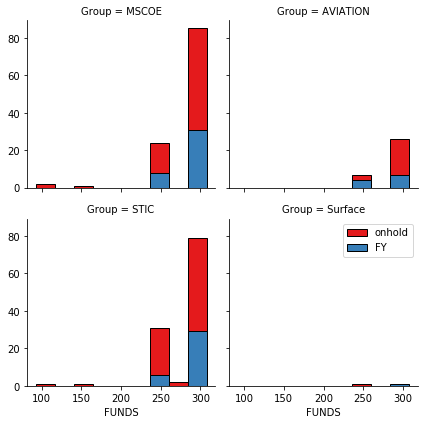

In [87]:
import seaborn as sns

#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
# show relation to score 18 - 51
#bins = np.linspace(df_rdc.age.min(), df_rdc.age.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'age', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
#----------------------------------------------------
import seaborn as sns

#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
# show relation to score 18 - 51
bins = np.linspace(df_newhead.FUNDS.min(), df_newhead.FUNDS.max(), 10)
g = sns.FacetGrid(df_newhead, col="Group", hue="FYHold", palette="Set1", col_wrap=2)
g.map(plt.hist, 'FUNDS', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

THese graphs map how projects by branch can be viewed for onhold or execution status. Total record count = 346.

In [25]:
#df[['Principal','terms','age','Gender','education']].head()
#df_rdc[['Principal','terms','age','Gender','education']].head()

df_newhead[['FUNDS','Score','Months']].head


<bound method NDFrame.head of       FUNDS  Score  Months
1    1000.0   45.0      30
2    1000.0   33.0      30
3    1000.0   27.0      15
4    1000.0   28.0      30
5    1000.0   29.0      30
..      ...    ...     ...
342   800.0   32.0      15
343  1000.0   25.0      30
344   800.0   39.0      15
345  1000.0   28.0      30
346  1000.0   26.0      30

[346 rows x 3 columns]>

Use one hot encoding technique to convert categorical varables to binary variables and 
append them to the feature Data Frame. The features tested for classification are FUNDS, Score, Group and Months. Afer looking at the dataframe we are ready to select the features of interest and begin comparing classifiers ( KNN, SVM and Decision Tree)

In [27]:
Feature = df_rdc[['Principal','terms','age']]
Feature1 = df_newhead[['FUNDS','Score','Months']]
Feature = pd.concat([Feature,pd.get_dummies(df_rdc['age'])], axis=1)


Lets define feature sets, X:  Funding amount, Branch assigned, Length of Project and target Y: onhold or execute

In [28]:
X = Feature
#X[0:5]


The target set is the prediction of whether the result will be on hold or assigned for FY execution

In [29]:
y = df_rdc['loan_status'].values
y[0:30]


array(['onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold'],
      dtype=object)

#### 6.3 Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [30]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458, -0.79676004,  2.33152555, -0.05383819, -0.07624929,
        -0.09352195, -0.12108987, -0.14369749, -0.15384615, -0.20535013,
        -0.22019275, -0.30246099, -0.27907279, -0.27300945, -0.29092868,
        -0.29092868, -0.24104766, -0.20535013, -0.22731417, -0.2476887 ,
        -0.2476887 , -0.16342041, -0.18120657, -0.16342041, -0.15384615,
        -0.15384615, -0.07624929, -0.09352195, -0.09352195, -0.10814761,
         9.246621  , -0.07624929, -0.05383819, -0.09352195, -0.05383819],
       [ 0.51578458, -0.79676004,  0.34170148, -0.05383819, -0.07624929,
        -0.09352195, -0.12108987, -0.14369749, -0.15384615, -0.20535013,
        -0.22019275, -0.30246099, -0.27907279, -0.27300945, -0.29092868,
        -0.29092868, -0.24104766, -0.20535013,  4.39919779, -0.2476887 ,
        -0.2476887 , -0.16342041, -0.18120657, -0.16342041, -0.15384615,
        -0.15384615, -0.07624929, -0.09352195, -0.09352195, -0.10814761,
        -0.10814761, -0.07624929, -0.05383819, -0.

#### 6.4 Classifiers

Classifiers : K Nearest Neighbor(KNN): To proceed with classification, we split the data into training and test sets. I tested the split ratios as 60/40 and 80/20 but the 70/30 split gave the best result. The training data will teaches the algorithm how the data moves  and is classified. The Test set is evaluated as measured of goodness for the model classifier.  Each model was assigned the same train/test set. Each result (e.g. SVMyhat, KNNyhat, DECTReeyhat) was named uniquely for use in a summary table. A F1score and Jaccard score is calculated for each prediction then compared for accuracy. First I start with K Nearest Neighbor(KNN). 


In [31]:
#USE THIS - figure out how to use given data to split train/test
# from lab example
# IMPORT KNN
#from sklearn.neighbors import KNeighborsClassifier
# Generate confusion matrix
#-------------------------------------------------------------------Examples above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for k in range(1,10):    
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
# let's see the array
    yhat
#mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)

std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
std_acc
#
# From Example ---- begin

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
cm
#from example --------- end
#from labs begin -----
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
std_acc
#from lab END ----

## Take these for final table jaccard_similarity_score(y_test, yhat)
### Assign fr final table
#KNNy_test = y_test
#KNNyhat = yhat
#For LogRegression F1 Score' use variable (y_test, yhat, average='weighted'))
#Jaccard from LAB exercise classifiers
#FOr Logregression Jaccard score:',jaccard_similarity_score(y_test, yhat))
#For 'LogRegression Log Loss Score:',log_loss(y_test, yhat_prob))
#for SVM model take yhat, y_test
#print("Avg (linear kernel) F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))
#
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
KNN_jaccard = jaccard_similarity_score(y_test,yhat)
#help (jaccard_similarity_score)
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)

Train set: (242, 35) (242,)
Test set: (104, 35) (104,)
KNN Jaccard score:  0.7115384615384616
KNN F1 score: 0.6235955056179775


By comparison the KNN Jaccard score performed better than the F1score with k =5 as calculated below.

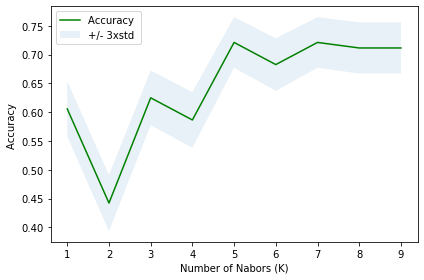

This graph shows best accuracy was with 0.7211538461538461 with k= 5


In [32]:

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "This graph shows best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Classifier : Decision Tree : This model uses the same train/test set as expected. It is important to use the same data otherwise a comparison would not be fruitful. I have chosen the criterion "entropy" for this fit.Again the data is split 70/30 as assigned to dataframes X and Y.

In [33]:
import numpy as np 
import pandas as pd
# New classifier Decision Tree
#
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree.fit(X_train,y_train)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

Train set: (242, 35) (242,)
Test set: (104, 35) (104,)


In [34]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree # it shows the default parameters
decisionTree.fit(X_train,y_train)
#
predTree = decisionTree.predict(X_test)
#
from sklearn import metrics
import matplotlib.pyplot as plt
#print("DecisionTree Accuracy Jaccard Score: ", metrics.accuracy_score(y_test, predTree))
# From example --- Begin
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predTree)
cm
#from example END
#
#let's see it
print (predTree [0:5])
print (y_test [0:5])
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
#Summarizing so far
#help (jaccard_similarity_score)
## KNN Results 

['onhold' 'onhold' 'onhold' 'onhold' 'onhold']
['onhold' 'onhold' 'onhold' 'onhold' 'onhold']


### --------------Summarizing results so far --------------------

In [35]:
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
#
## For Decision Tree ----------------------------------
DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
print ("    DECTree F1 score:", DECTree_F1Score)

KNN Jaccard score:  0.7115384615384616
KNN F1 score: 0.6107127335940896
    DECTree Jaccard score:  0.7307692307692307
    DECTree F1 score: 0.6252136752136752


KNN with Jaccard, F1Score and Decision Tree Results. So far Decision Tree Jaccard Score is best performer to predict the test set from the training set.

Classifier: Support Vector Machine: The SVM algorithm offers a choice of kernel functions for 
performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. 
The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
1.Linear 2.Polynomial 3.Radial basis function (RBF) 4.Sigmoid

I experimented with linear type though I chose with the RBF as an option for this data. This portion was re-used from the graded assignemnt submitted previously.

In [39]:
# EXAMPLE graph from SVM lab
# instructional note ------


#Each of these functions has its characteristics, its pros and cons, and its equation, 
#but as there's no easy way of knowing which function performs best with any given dataset, 
#we usually choose different functions in turn and compare the results. 
#Let's just use the default, RBF (Radial Basis Function) 

#ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
#cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
#plt.show()
#feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#X = np.asarray(feature_df)
#X[0:5]
# from svm train-test split as above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


Train set: (276, 35) (276,)
Test set: (70, 35) (70,)


In [40]:
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
###from example 
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
SVM_yhat = SVM_model.predict(X_test)

#SVM_yhat = SVM_model.predict(test_X)
#print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
#print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

#
#SVM_yhat = SVMrbf.predict(X_test)
#print( "svm_yhat",SVM_yhat)
#SVM_F1Score = f1_score(y_test,SVM_yhat)
#SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#let's see it
#import itertools
# from example ----
#SVM_yhat = SVM_model.predict(test_X)
#print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
#print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

#help (jaccard_similarity_score)
## Summarizing so far

Train set: (276, 35) (276,)
Test set: (70, 35) (70,)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### ---------SUMMARY RESULTS ------


In [41]:
## --------------------For KNN --------------------

print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
#
## --------------------For Decision Tree ----------------------------------
#DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
print ("    DECTree F1 score:", DECTree_F1Score)
## ---------------------For SVM  ----------------------------------
SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#help (jaccard_similarity_score)
print ("SVM Jaccard score: ",SVM_Jaccard)
#help (f1_score)
SVM_F1Score = f1_score(y_test,SVM_yhat, average ='weighted')
print ("SVM F1 score:", SVM_F1Score)

KNN Jaccard score:  0.7115384615384616
KNN F1 score: 0.6107127335940896
    DECTree Jaccard score:  0.7307692307692307
    DECTree F1 score: 0.6252136752136752
SVM Jaccard score:  0.7714285714285715
SVM F1 score: 0.6843317972350231


This summary shows the results from classifier models with SVM performing the best using a Jaccard Score. Both the Decision Tree and KNN provided similar evaluation metrics for both the Jaccard score and F1score.

#### 6.5 Geographical Mapping

These maps display the field operational requests coming from districts as marker with the relevant category. The dataframe contains various districts along with category of requests from that district. Ultimately, the map is a representation and categorization that can be related to the dataframe in the main report for each of the mission or technical research branches (MSCOE, AVIATION, SURFACE, STIC) discussed in previous sections.
Additionally, a Foursquare rendering of locations of interest in the area are provided. I chose to center the work around San Francisco where the districts as mapped with Folium are located.

First, import required modules and libraries.

In [52]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import requests # library to handle requests

import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from PIL import Image # converting images into arrays
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

#define credentials for Foursqaure access
CLIENT_ID = 'V3R4GWWHBFL23A4OEPUFIUX3XRT2GICELQSPXRHJ1DAS0C2A' # your Foursquare ID
CLIENT_SECRET = 'WMLA0CKK2CTN2F1D0GBGSKN00EVX5LL4ZLQZSPYJZIOTEEPE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates      anaconda::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi               anaconda::certifi-2020.4.5.1-py36_0 --> conda-forge::certifi-2020.4.5.1-py36h9f0ad1d_0
  openssl               anaconda::openssl-1.1.1g-h7b6447c_0 --> conda-forge::openssl-1.1.1g-h516909a_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.
Your credentails:
CLIENT_ID: V3R4GWWHBFL23A4OEPUFIUX3XRT2GICELQSPXRHJ1DAS0C2A
CLIENT_SECRET:WMLA0CKK2CTN2F1D0GBGSKN00EVX5LL4ZLQZSPYJZIOTEEPE


Define location data as latitude/longitude and specify search query preference for Vegan restaurant nearby to the work site. I chose to search near Lombard Street. The search is performed with criteria matching "Vegan" from the Foursquare database. The query is then performed through the json file and the resulting dataframe is shown.

In [53]:
address = 'Lombard St, San Francisco, CA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Vegan'
radius = 500
print(search_query + ' .... OK!')

# Here's where we find the data
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()

results
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
#Future reference use pandas.json_normalize instead
dataframe = json_normalize(venues)
dataframe.head()

37.802076 -122.4188091
Vegan .... OK!


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,51ba997b8bbd6f2322d7d5c5,vegan09.com,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1590366665,False,37.803036,-122.42486,"[{'label': 'display', 'lat': 37.80303649357777...",542,94109,US,San Francisco,CA,United States,"[San Francisco, CA 94109, United States]"


There is one vegan restaurant in our area of interest with the name vegan09.com 
Foursquare show the venue_id = '51ba997b8bbd6f2322d7d5c5' in the dataframe column "ID". From this point, I keep only the columns that include venue, name and category. The venue of interest is then mapped with Folium.

In [54]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
# Get a list of names under this category and check more details on one of interest
dataframe_filtered.name
latitude = 37.803036
longitude = 122.42486
venue_id = '51ba997b8bbd6f2322d7d5c5' # ID of our place of interest retrieved from dataframe ID column
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred 
# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

For this report, a map centered around San Francisco where our Vegan restaurant was located  with coordinate latitude = 37.803036
longitude = 122.42486 by Foursquare.

In [55]:
vegan_map = folium.Map(location=[37.774929, -122.419418], zoom_start=14) 
vegan_map

STAMEN TERRAIN are maps that feature hill shading and natural vegetation colors.  Now the the relevant District markers are added to the map with the dataframe data. I chose the Stamen Terrain map because terrain and environment are important elements for contextual analysis of the data.

In [56]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv"

print('Dataset downloaded and read into a pandas dataframe!')
df = df_incidents
#
#headers = ["IncidntNum","Category","Descript","DayOfWeek","Date","Time","Field","Desc","Date","District","X", "Y","Location"]
#df_map = pd.read_csv(filename, names = headers)
# Keep only columns to use

df_incidents.drop ('IncidntNum', axis = 1, inplace =True)
df_incidents.drop ('DayOfWeek', axis = 1, inplace =True)
df_incidents.drop ('Time', axis = 1, inplace =True)
df_incidents.drop ('Address', axis = 1, inplace =True)
df_incidents.drop ('PdId', axis = 1, inplace =True)
df_incidents.drop ('Resolution', axis = 1, inplace =True)
df_incidents.drop ('Date', axis = 1, inplace =True)
#
#df_map.drop ('IncidntNum', axis = 1, inplace =True)
#df_map.drop ('DayOfWeek', axis = 1, inplace =True)
#df_map.drop ('Time', axis = 1, inplace =True)
#df_map.drop ('Address', axis = 1, inplace =True)
#df_map.drop ('PdId', axis = 1, inplace =True)
#df_map.drop ('Resolution', axis = 1, inplace =True)

Dataset downloaded and read into a pandas dataframe!


I started with this data frame and wrangled the data so it was relevant to this project keeping the location lat/lon constant.
I removed columns that were not of interest. Wrangling the data here requires replacement of object values in columns Category(changed to technical groups and branches) and District ( changed to organizational district names). The description were left unchanged since these could be similar in context to our work environment.

In [57]:
print (" Original Values in dataframe are listed here")
df_incidents.head(20)
# Replace data in Districts and Category
#headers = ["Field","Desc","Date","District","X", "Y","Location"]
#df_map = pd.read_csv(filename, names = headers)

df_incidents.replace({'PdDistrict': {'SOUTHERN': 'D8', 'BAYVIEW': 'D11','MISSION':'D7','TENDERLOIN':'D5','NORTHERN':'D1'}}, inplace=True)
df_incidents.replace({'PdDistrict': {'TARAVAL': 'D13', 'CENTRAL': 'D6','INGLESIDE':'D9','PARK':'D4','RICHMOND':'10'}}, inplace=True)

df_incidents.replace({'Category': {'WARRANTS': 'SURFACE', 'WEAPON LAWS': 'MSCOE','NON-CRIMINAL':'AVIATION','BURGLARY':'EW'}}, inplace=True)
df_incidents.replace({'Category': {'ASSAULT': 'Network', 'OTHER OFFENSES': 'COMMS','ROBBERY':'STIC','FRAUD':'IT'}}, inplace=True)
df_incidents.replace({'Category': {'LARCENY/THEFT': 'REACT', 'MISSING PERSON': 'LE','VEHICLE THEFT':'Intel','VANDALISM':'AoA'}}, inplace=True)
df_incidents.replace({'Category': {'MISSING PERSON': 'FISHERIES', 'RECOVERED VEHICLE': 'Explore','VEHICLE THEFT':'Intel','VANDALISM':'AoA'}}, inplace=True)
df_incidents.replace({'Descript': {'AUTO': 'VESSEL', 'PROPERTY': 'at SEA','FRAUDULENT GAME OR TRICK':'LE'}}, inplace=True)
df_incidents.replace({'Descript': {'AUTO': 'VESSEL', 'PROPERTY': 'at SEA','FRAUDULENT GAME OR TRICK':'LE'}}, inplace=True)
print(" Revised dataframe follows:")
df_incidents.head(10)

 Original Values in dataframe are listed here
 Revised dataframe follows:


,Category,Descript,PdDistrict,X,Y,Location
0,MSCOE,POSS OF PROHIBITED WEAPON,D8,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
1,MSCOE,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",D8,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
2,SURFACE,WARRANT ARREST,D11,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)"
3,AVIATION,LOST PROPERTY,D5,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)"
4,AVIATION,LOST PROPERTY,D7,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)"
5,Network,BATTERY,D1,-122.426077,37.788019,"(37.788018555829, -122.426077177375)"
6,COMMS,PAROLE VIOLATION,D8,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)"
7,AVIATION,FIRE REPORT,D5,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)"
8,SURFACE,WARRANT ARREST,D8,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)"
9,LE,FOUND PERSON,D11,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)"


So each row consists of 6 features:

> 1. **Category**: Technical Branch
> 2. **Descript**: Description of request
> 3. **District**: The district of interest

> 4. **X**: The longitude value of the crime location 
> 5. **Y**: The latitude value of the crime location
> 6. **Location**: A tuple of the latitude and the longitude values

Originally the set contained over 150K rows. The cleaned data set contains 100 rows and 6 columns.

In [58]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.shape

(100, 6)

Now that the data is reduced, visualize where events took place in the city of San Francisco by mapping with an initial zoom level = 12.

In [59]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
# display the map of San Francisco
sanfran_map

Now superimpose the locations of district requests onto the map. This is done with feature group definition and poppups on markers indicating which technical group applies. 

In [60]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

The markers on this map represents the requests from various districts across the organization. Each marker has a poppup value associated with the relevant technical group that may perform the research work (e.g. Aviation, Law Enforcement, Network, COMMs, etc). This map could be used to provide relevant information to the researchers by understanding the nature of the tasks, the characteriZation of the research as well as any geographic information that could be leveraged.

# 7. CONCLUSION

In this study, I analyzed the relationship between organizational components in the context of Fiscal Year cycle for the research portfolio review. Some ideas or request submitted are put onhold or are executed. Characteristics of the dataset used were limited in terms of the full scope of considerations but were representative of the real-world data. The evaluation metrics of the classifiers were an important part of this work. These results help to guide a path forward for future organizational modeling. 
The relationships between the categories of data examine revealed percentages of work assigned to specific technical branches as well as types of research work most suited to the technical skill sets of those groups.  The SVM model was the best performer which correctly identified the variety of attributes in the data set to decide target status. This is useful as future work would involve additional variety of idea/request attributes.  

# 8. RECOMMENDATIONS

Based on the work from this project, I recommend that future studies in this data space be performed. Additional attributes could be included to refine the insights and promote organizational efficiency and effectiveness. This work could also be applied to text and reports to evaluate keyword classification and effectiveness of search mechanisms within the protected database.